# Challenge 5 - Classification
Ozzie Liu  
2/9/2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [2]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
house_votes = pd.read_csv("house-votes-84.data", names=column_names)

In [3]:
house_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
## Change 'y' and 'n' to 1 and 0.
house_votes.replace(to_replace='y', value=1, inplace = True)
house_votes.replace(to_replace='n', value=0, inplace = True)


In [5]:
## Replace ? with the votes' mean
house_votes.replace(to_replace='?', value=np.nan, inplace = True)
house_votes.fillna(house_votes.mean(), inplace=True)

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


## Challenge 2

Split the data into a test and training set. Use this function:

`from sklearn.cross_validation import train_test_split`

In [6]:
from sklearn.cross_validation import train_test_split

In [7]:
X = house_votes.drop(['party'], 1)
y = house_votes.party

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

## Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat).

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

Which k value gives the highest accuracy?

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
n_neighbors = range(1,21)
knn_accuracy = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))

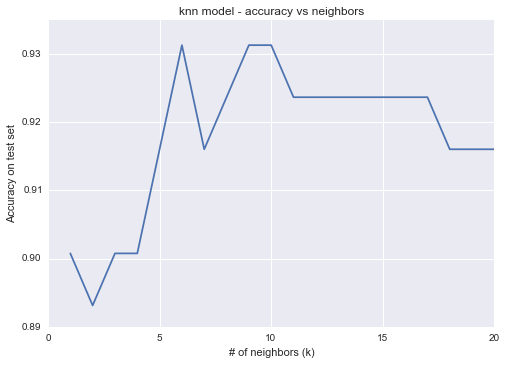

In [11]:
plt.plot(n_neighbors, knn_accuracy)
plt.xlabel('# of neighbors (k)')
plt.ylabel('Accuracy on test set')
plt.title('knn model - accuracy vs neighbors')

k of 6, 9, and 10 gives the highest accuracy so far on the test set

## Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
## Make a logistic regression object, fit it on the training set, and test it to find accuracy
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
logistic_prediction = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, logistic_prediction)
print log_reg_accuracy

0.93893129771


## Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

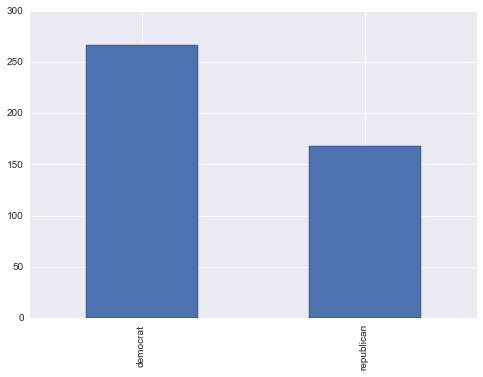

In [14]:
house_votes.party.value_counts().plot(kind = 'bar')

There are 168 republicans and 267 democrats in the house

In [15]:
## Here's a predictor that predicts everyone to be a democrat
def all_democrat(X):
    return ['democrat' for _ in range(len(X))]

democrat_prediction = all_democrat(X_test)
dem_acc = accuracy_score(y_test, democrat_prediction)
print dem_acc

0.587786259542


Looks like a 0.588 accuracy score if by predicting all democrats.

In [16]:
## Here's a predictor that predicts everyone to be a republican
def all_republican(X):
    return ['republican' for _ in range(len(X))]

republican_prediction = all_republican(X_test)
rep_acc = accuracy_score(y_test, republican_prediction)
print rep_acc

0.412213740458


And we have a 0.422 accuracy in this case

## Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

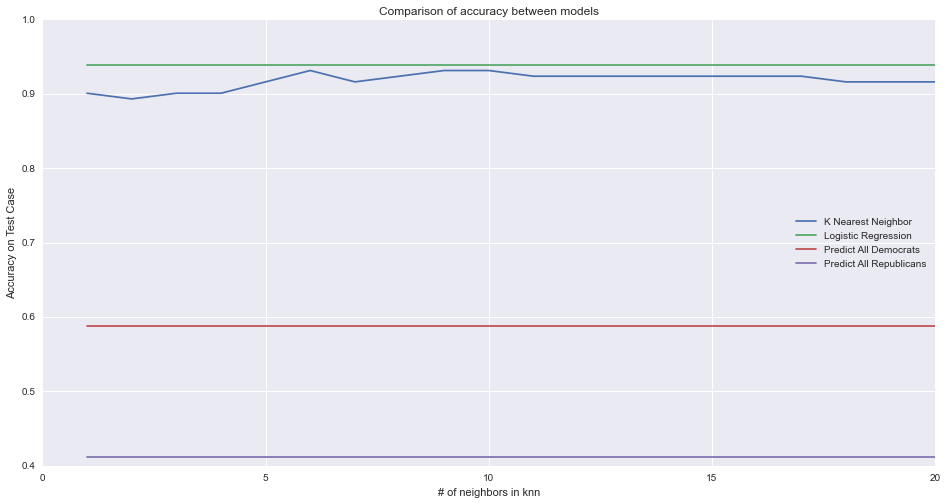

In [17]:
plt.figure(figsize=(16,8))
plt.plot(n_neighbors, knn_accuracy, '-', label = 'K Nearest Neighbor')
plt.plot(n_neighbors, [log_reg_accuracy]*20, '-', label = 'Logistic Regression')
plt.plot(n_neighbors, [dem_acc]*20, '-', label = 'Predict All Democrats')
plt.plot(n_neighbors, [rep_acc]*20, '-', label = 'Predict All Republicans')
plt.title('Comparison of accuracy between models')
plt.xlabel('# of neighbors in knn')
plt.ylabel('Accuracy on Test Case')
plt.legend(loc = 0)

## Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

`from sklearn.learning_curve import learning_curve`

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [18]:
from sklearn.learning_curve import learning_curve

In [19]:
[m, train_score, test_score] = learning_curve(log_reg, house_votes.drop(['party'], 1), house_votes.party)

In [20]:
train_cv_err = np.mean(train_score, axis=1)
test_cv_err = np.mean(test_score, axis=1)

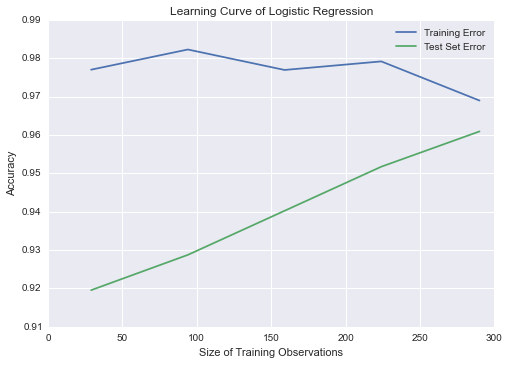

In [21]:
plt.plot(m, train_cv_err, label='Training Error')
plt.plot(m, test_cv_err, label = 'Test Set Error')
plt.title('Learning Curve of Logistic Regression')
plt.xlabel('Size of Training Observations')
plt.ylabel('Accuracy')
plt.legend(loc=0)

In [22]:
[m2, train_score2, test_score2] = learning_curve(KNeighborsClassifier(6), 
                                    house_votes.drop(['party'], 1), house_votes.party)

In [23]:
train_cv_err2 = np.mean(train_score2, axis=1)
test_cv_err2 = np.mean(test_score2, axis=1)

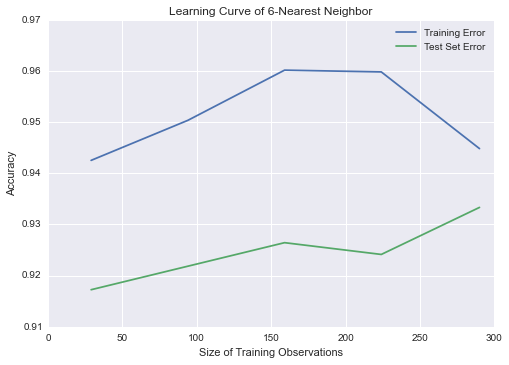

In [24]:
plt.plot(m2, train_cv_err2, label='Training Error')
plt.plot(m2, test_cv_err2, label = 'Test Set Error')
plt.title('Learning Curve of 6-Nearest Neighbor')
plt.xlabel('Size of Training Observations')
plt.ylabel('Accuracy')
plt.legend(loc=0)

## Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Gaussian Naive Bayes Classifier

In [26]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predict)
print gnb_accuracy

0.93893129771


### Support Vector Machine (SVM)

In [27]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predict)
print svm_accuracy

0.954198473282


### Decision Tree

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predict)
print tree_accuracy

0.946564885496


### Random Forest

In [29]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_predict)
print forest_accuracy

0.954198473282


## Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

`from sklearn.cross_validation import cross_val_score`

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [30]:
from sklearn.cross_validation import cross_val_score

In [31]:
gnb_cv = np.mean(cross_val_score(gnb, X, y))
svm_cv = np.mean(cross_val_score(svm, X, y))
tree_cv = np.mean(cross_val_score(tree, X, y))
forest_cv = np.mean(cross_val_score(forest, X, y))

In [32]:
print 'Accuracy of Cross Validated Models'
print 'Gaussian Naive Bayes:\t', gnb_cv
print 'Support Vector Machine:\t', svm_cv
print 'Decision Tree:\t\t', tree_cv
print 'Random Forest:\t\t', forest_cv

Accuracy of Cross Validated Models
Gaussian Naive Bayes:	0.931034482759
Support Vector Machine:	0.954022988506
Decision Tree:		0.958620689655
Random Forest:		0.96091954023


## Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

> I pick the immigration bill to predict

In [33]:
house_votes2 = pd.read_csv("house-votes-84.data", names=column_names)

## Change 'y' and 'n' to 1 and 0. And ? to NaN
house_votes2.replace(to_replace='y', value=1, inplace = True)
house_votes2.replace(to_replace='n', value=0, inplace = True)
house_votes2.replace(to_replace='?', value=np.nan, inplace = True)

In [34]:
## Replace Nan with the votes' mode
house_votes2.fillna(house_votes2.mode().iloc[0], inplace=True)

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1


In [35]:
y2 = house_votes2.immigration
X2 = house_votes2.drop(['party', 'immigration'], 1)

In [36]:
logistic2 = LogisticRegression()
logistic2.fit(X2, y2)
logistic_cv = np.mean(cross_val_score(logistic2, X2, y2))

In [37]:
print 'Accuracy of predicting Immigration bill votes with Logistic Regression:', logistic_cv

Accuracy of predicting Immigration bill votes with Logistic Regression: 0.523900216939


## Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [38]:
movies = pd.read_csv("../03-Linear-Regression/2013_movies.csv")

In [39]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


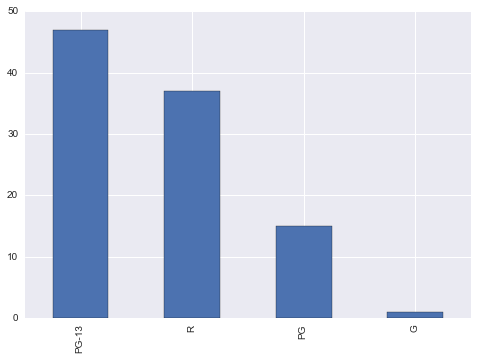

In [40]:
movies.Rating.value_counts().plot(kind='bar')

In [41]:
movies = movies.dropna()
X_movies = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
y_movies = movies.Rating

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_movies, y_movies, test_size = 0.3, random_state = 4444)

In [42]:
knn_movies = KNeighborsClassifier(5)
knn_movies.fit(X_m_train, y_m_train)
knn_m_prediction = knn_movies.predict(X_m_test)
knn_m_accuracy = accuracy_score(y_m_test, knn_m_prediction)
# knn_cv_movies = cross_val_score(knn_movies, X_movies, y_movies)
print knn_m_prediction
print 'KNN CV accuracy:', knn_m_accuracy

['R' 'PG-13' 'R' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'R' 'R' 'PG-13' 'PG-13'
 'PG-13' 'PG-13' 'R' 'R' 'PG-13' 'R' 'PG-13' 'R' 'R' 'R' 'R' 'PG-13'
 'PG-13' 'PG-13' 'R' 'PG']
KNN CV accuracy: 0.555555555556


In [43]:
log_movies = LogisticRegression()
log_movies.fit(X_m_train, y_m_train)
log_m_prediction = log_movies.predict(X_m_test)
log_m_accuracy = accuracy_score(y_m_test, log_m_prediction)
print log_m_prediction
print 'Logistic Regression accuracy:', log_m_accuracy

['PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'R' 'R' 'PG-13'
 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'R' 'PG-13' 'R' 'PG-13' 'PG-13' 'PG-13'
 'PG-13' 'R' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13']
Logistic Regression accuracy: 0.444444444444


In [44]:
pg13_prediction = [y_movies.mode()]*len(y_m_test)
baseline = accuracy_score(y_m_test, pg13_prediction)
print 'Baseline Accuracy - Predicting all PG-13s:', baseline

Baseline Accuracy - Predicting all PG-13s: 0.407407407407


In [45]:
print 'KNN is %r percent better and \nlogistic regression is %r percent better than baseline' %((knn_m_accuracy-baseline)/baseline*100, (log_m_accuracy-baseline)*100/baseline)

KNN is 36.363636363636374 percent better and 
logistic regression is 9.0909090909090899 percent better than baseline


In [46]:
log_movies.coef_

array([[ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13],
       [  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14],
       [ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]])

The coefficients return from the logistic regression model are log-odds that tell us about the attribute's relationship to the target. A positive value means a positive relationship. But to actually get an intuition, we have to calculate the odds ratio.

## Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

- What is the average and standard deviation of the age of all of the patients?
- What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
- What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
- Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
- What is the earliest year of surgery in this dataset?
- What is the most recent year of surgery?
- Use logistic regression to predict survival after 5 years. How well does your model do?
- What are the coefficients of logistic regression? Which features affect the outcome how?
- Draw the learning curve for logistic regression in this case.

In [47]:
survival = pd.read_csv('haberman.data', names = ['age', 'year', 'nodes', 'survival'])

In [48]:
print 'Average of age:', np.mean(survival.age)
print 'Standard deviation of age:', np.std(survival.age)

Average of age: 52.4575163399
Standard deviation of age: 10.7857852036


In [49]:
survived = survival[survival['survival'] == 1]
print 'Of patients that survived 5 or more years:\nAverage age:', np.mean(survived.age)
print 'Standard deviation of age:', np.std(survived.age)

Of patients that survived 5 or more years:
Average age: 52.0177777778
Standard deviation of age: 10.9876554751


In [50]:
didnt_survived = survival[survival['survival'] == 2]
print 'Of patients that did not survive after 5 years:\nAverage age:', np.mean(didnt_survived.age, )
print 'Standard deviation of age:', np.std(didnt_survived.age)

Of patients that did not survive after 5 years:
Average age: 53.6790123457
Standard deviation of age: 10.104182193


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a954cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ab34dd0>]], dtype=object)

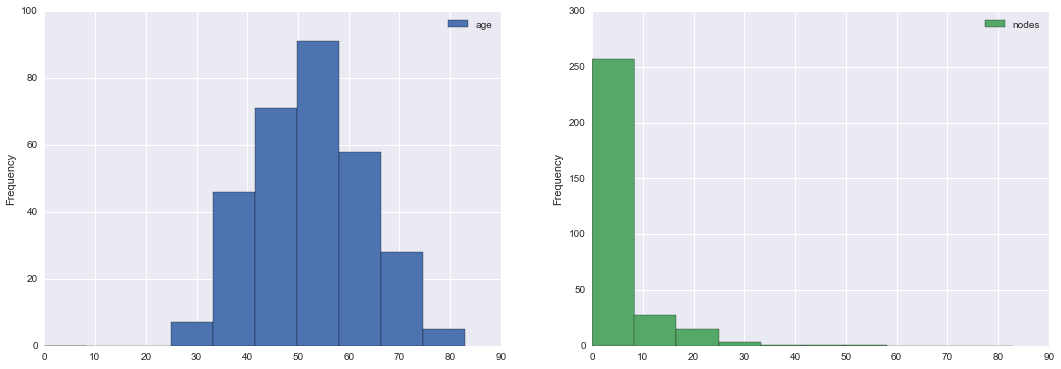

In [51]:
## Histograms side by side
survival[['age', 'nodes']].plot(kind='hist', subplots = True, layout = (1,2), figsize = (18,6))

In [52]:
## Earliest year is 1958
min(survival.year)

58

In [53]:
## Most recent year is 1969
max(survival.year)

69

In [54]:
## Use logistic regression to predict survival 5+ years
y = survival.survival
X = survival.drop(['survival'], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)
survival_logreg = LogisticRegression()
survival_logreg.fit(X_train, y_train)
survival_prediction = survival_logreg.predict(X_test)
survival_accuracy = accuracy_score(y_test, survival_prediction)
print 'Logistic Regression accuracy:', survival_accuracy

Logistic Regression accuracy: 0.815217391304


In [55]:
## Coefficients of logistic regression
survival_logreg.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

The coefficients says that age and number of nodes have a correlation with the chance of survival, where as time has an opposite effect

In [56]:
## Learning Curve
[m3, train_score3, test_score3] = learning_curve(survival_logreg, X, y)

In [57]:
train_score3 = np.mean(train_score3, axis=1)
test_score3 = np.mean(test_score3, axis = 1)

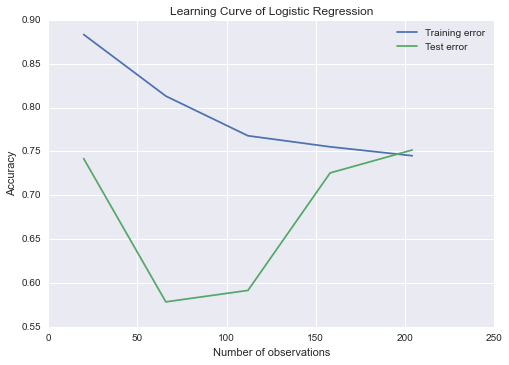

In [58]:
plt.plot(m3, train_score3, label = 'Training error')
plt.plot(m3, test_score3, label = 'Test error')
plt.legend(loc=0)
plt.title('Learning Curve of Logistic Regression')
plt.xlabel('Number of observations')
plt.ylabel('Accuracy')